<a href="https://colab.research.google.com/github/CarlosBaez11/RetoTecnologico-Eafit/blob/main/Presentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos liberías

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import missingno as msn

# Análisis exploratorio de datos

Importamos los datos

In [33]:
!git clone https://github.com/CarlosBaez11/RetoTecnologico-Eafit.git

fatal: destination path 'RetoTecnologico-Eafit' already exists and is not an empty directory.


In [34]:
data=pd.read_excel("/content/RetoTecnologico-Eafit/Caso 01 - Cobranza Sector Financiero.xlsx")

In [35]:
data.head(6)

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.0,152093.0,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,1978-12-06,5637605.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO
1,2712044,22,NaN,NaN,5,CONSUMO,40584.0,40584.0,2099,BOGOTA,...,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,2015-03-11,40584.0,<1M,NaN,SIN PROFESION,SIN OFICIO
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,1 a 15,NaN,SIN PROFESION,JUBILADO
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.0,1455631.0,2099,BOGOTA,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1990-09-01,5904653.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,1 a 15,AGROPECUARIO,AGRICULTOR,TAXISTA
5,1683416,104,NaN,NaN,3,TARJETAS DE CREDITO,610840.0,349729.0,4599,CARIBE,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,0,1972-10-01,610840.0,<1M,MADERAS Y SUS PRODUCTOS,CONTADOR,SIN OFICIO


<Axes: >

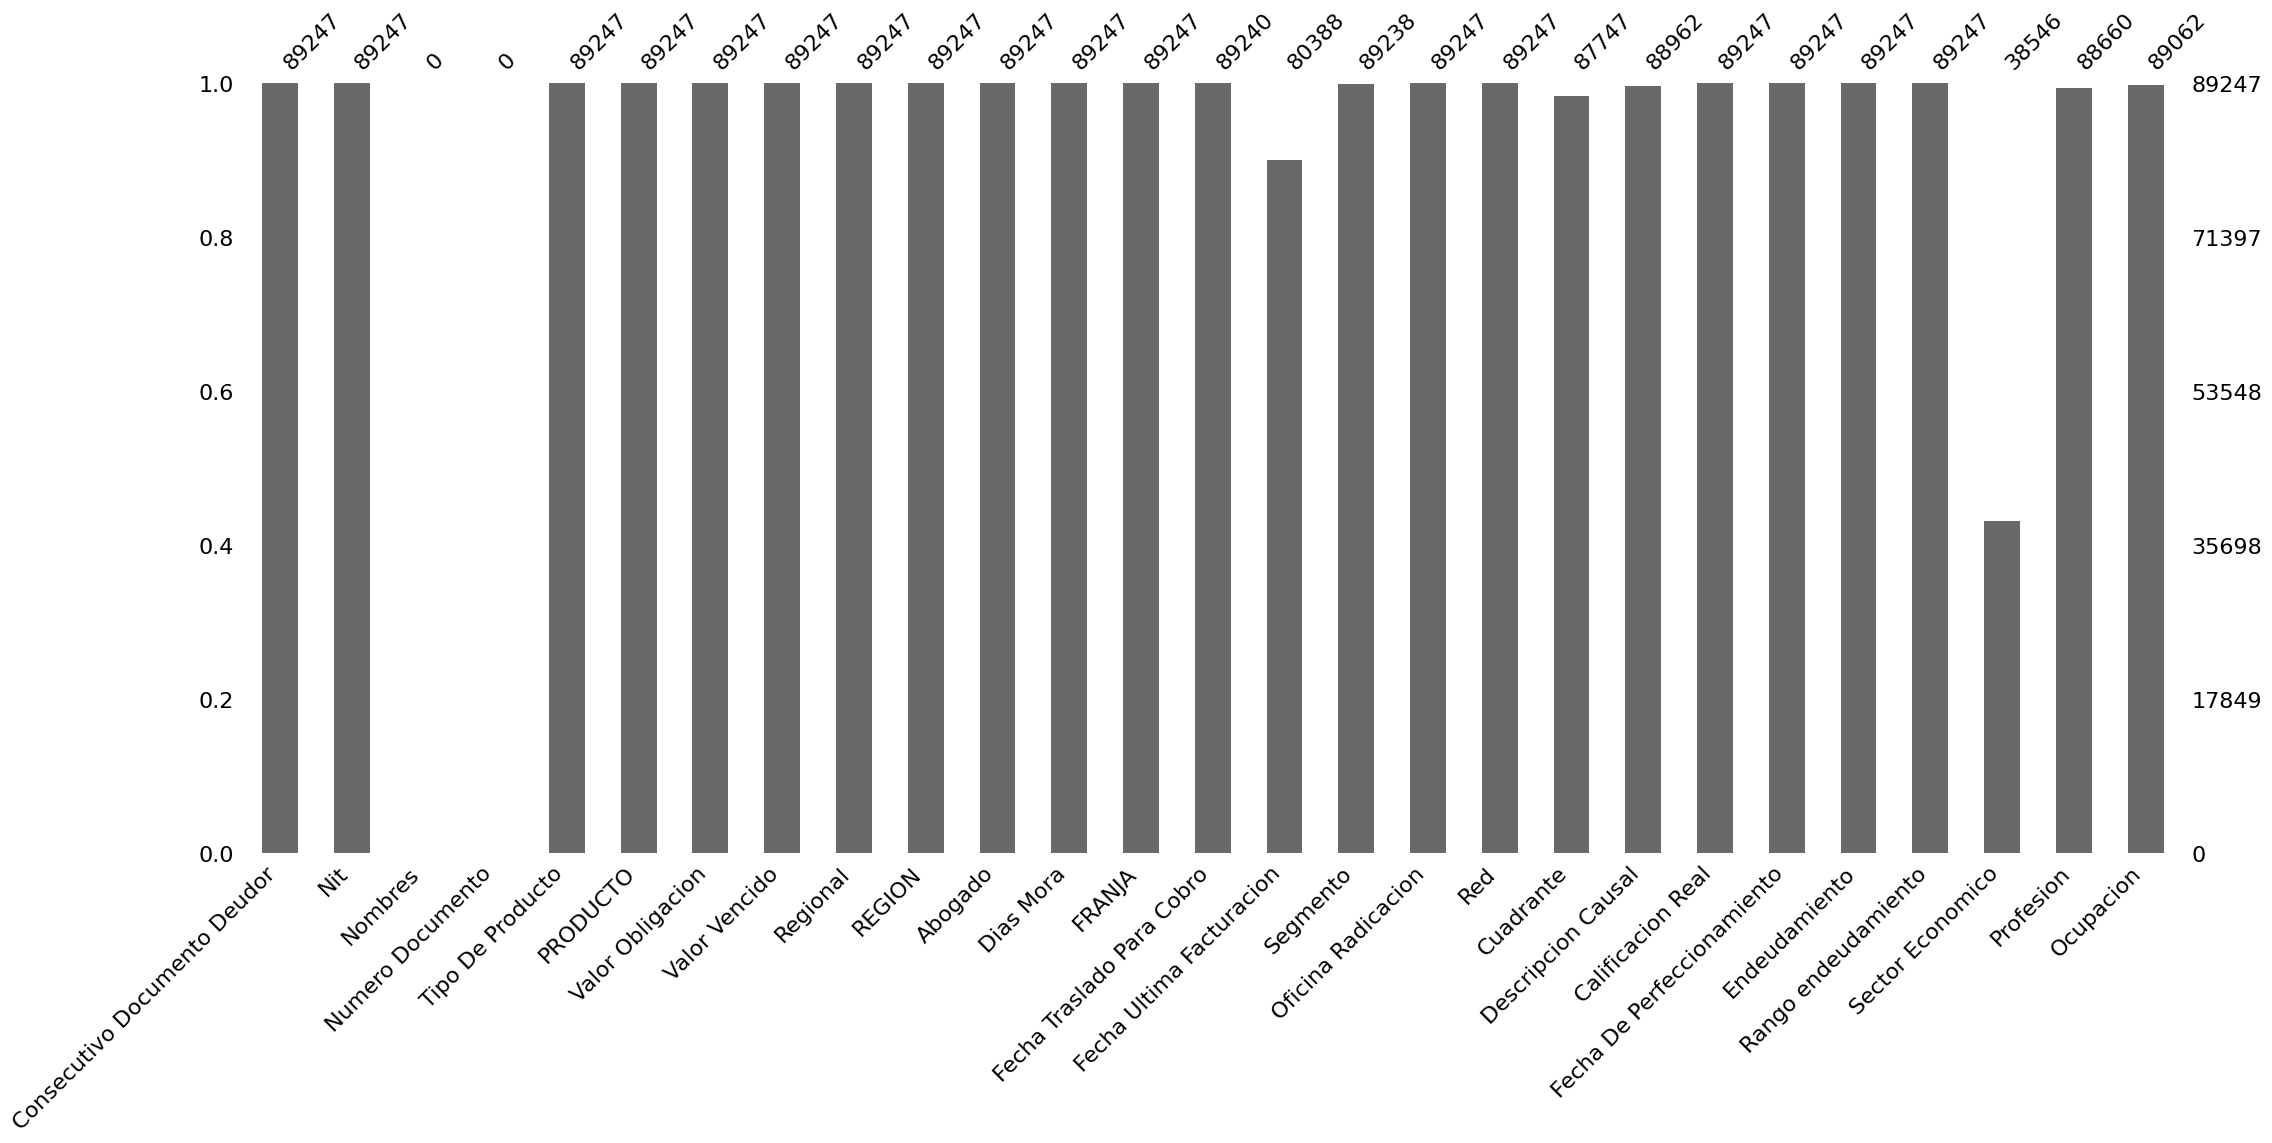

In [36]:
msn.bar(data)

Borramos columnas que no aportan información

In [37]:
data.drop(columns=["Nombres", "Numero Documento", "Sector Economico"], inplace=True)
data.dropna(inplace=True)

In [38]:
data.dropna(inplace=True)

In [39]:
print(data.dtypes)
print(data.shape)

Consecutivo Documento Deudor             int64
Nit                                      int64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  object
Abogado                                  int64
Dias Mora                                int64
FRANJA                                  object
Fecha Traslado Para Cobro       datetime64[ns]
Fecha Ultima Facturacion        datetime64[ns]
Segmento                                object
Oficina Radicacion                       int64
Red                                      int64
Cuadrante                               object
Descripcion Causal                      object
Calificacion Real                        int64
Fecha De Perfeccionamiento      datetime64[ns]
Endeudamiento                          float64
Rango endeuda

# Identificación de las causales de incumplimiento

Usando diferentes metodologias buscamos identificar el comportamiento de las variables y como estas en su conjunto podrian tener algun tipo de correlacion.
En primer lugar nos enfocaremos en las variables categoricas.



**Tablas de categoricas**

Analizando la relacion entre el Rango de endeudamiento con el producto es posible identificar que:

In [40]:
pd.crosstab(data['Rango endeudamiento'], data["PRODUCTO"], margins=True)/89062*100


PRODUCTO,CH PROPIA,CONSUMO,MASIVO SUFI,TARJETAS DE CREDITO,VEHICULOS SUFI,All
Rango endeudamiento,,,,,,
1 a 15,0.000000,11.302239,2.135591,30.984034,2.485909,46.907772
100 a 200,0.000000,0.332353,0.002246,0.245896,0.086457,0.666951
15 a 50,0.000000,6.675125,0.309896,5.879051,3.133772,15.997844
50 a 100,0.001123,1.889695,0.015719,1.050953,0.354809,3.312299
<1M,0.000000,1.323797,0.443511,18.882352,0.105544,20.755204
>200,0.000000,0.140352,0.000000,0.048281,0.024702,0.213335
All,0.001123,21.663560,2.906964,57.090566,6.191193,87.853405


In [41]:
endeudamiento_Producto=data.groupby(["PRODUCTO"]).aggregate({"Endeudamiento":"sum", "Dias Mora":"mean"}).sort_values(by="PRODUCTO", ascending=False)
endeudamiento_Producto

,Endeudamiento,Dias Mora
PRODUCTO,,
VEHICULOS SUFI,1.291812e+11,31.883206
TARJETAS DE CREDITO,3.768328e+11,47.978268
MASIVO SUFI,1.665796e+10,34.894940
CONSUMO,4.326595e+11,57.414170
CH PROPIA,6.369095e+07,4.000000


tambien podemos observar que los creditos de consumo y las tarjetas de credito son los productos que recogen la mayor cantidad de deuda,este dato mas que ayudar a entender a los clientes nos ayuda a identificar como se compone nuestra cartera de modo que se pueda contrarestar la situacion de la compañia con la cartera de clientes

Ahora analizemos la relación existente entre el  tipo de producto y la ocupación que tienen las personas:

In [42]:
pd.crosstab(data["PRODUCTO"], data["Ocupacion"], margins=True)/89062*100

Ocupacion,AMA DE CASA,EMPLEADO BANCOLOMBIA,EMPLEADO FILIAL,EMPLEADO SECTOR PRIVADO,EMPLEADO SECTOR PUBLICO,INDEPENDIENTE,JUBILADO,NO APLICA A ESTE PRODUCTO,SIN OFICIO,TAXISTA,TRABAJADOR OFICIAL,All
PRODUCTO,,,,,,,,,,,,
CH PROPIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001123,0.000000,0.000000,0.001123
CONSUMO,0.013474,0.002246,0.004491,3.048438,0.974602,3.544722,0.368283,0.154948,13.523164,0.020211,0.008983,21.663560
MASIVO SUFI,0.004491,0.001123,0.015719,0.593968,0.163931,0.350318,0.014597,0.025825,1.730255,0.000000,0.006737,2.906964
TARJETAS DE CREDITO,0.046035,0.006737,0.012351,9.058858,2.918192,5.295188,0.443511,0.317756,38.932429,0.028070,0.031439,57.090566
VEHICULOS SUFI,0.006737,0.000000,0.010105,1.024006,0.417687,1.483236,0.059509,0.061755,3.103456,0.002246,0.022456,6.191193
All,0.070737,0.010105,0.042667,13.725270,4.474411,10.673463,0.885900,0.560284,57.290427,0.050527,0.069614,87.853405


En la siguiente imagen podemos ver como es la distribución de las ocupaciones de los deudores según la región en la que se encuentren, esto para tratar de identificar la composicion de la deuda en las regiones y conocer el peso de los diferntes tipos de deudas en ellas.

<Axes: xlabel='REGION', ylabel='Count'>

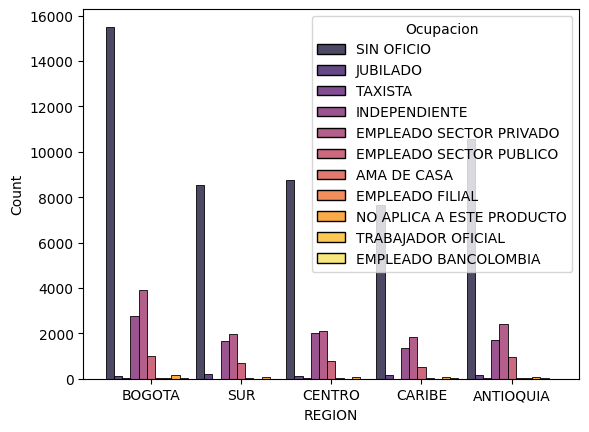

In [43]:
sns.histplot(data, x="REGION", hue="Ocupacion", multiple="dodge", palette="inferno")

Ahora a partir de estos datos veamos la distribución de los cuadrantes de las personas sin oficio

Cuando analizamos el cuadrante de las personas sin oficio podemos ver que la mayoría no tiene cuadrante definido, por lo cual a priori una estrategia recomendada es mejorar el seguimiento y la recoleccion de datos, de modo que sea posible identificar mejores las causales del No pago

<Axes: xlabel='REGION', ylabel='Count'>

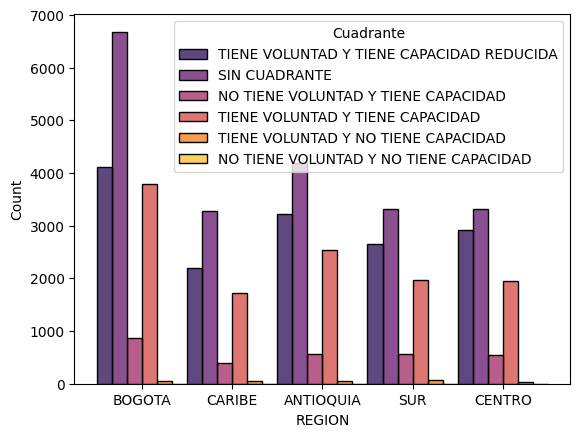

In [44]:
sns.histplot(data[data["Ocupacion"]=="SIN OFICIO"], x="REGION", hue="Cuadrante", multiple="dodge", palette="inferno")

Es importante verificar si se puede deducir la faltra de cuadrante a partir de la causal de mora que presenta el cliente. En la tabla siguiete podemos ver que la gran mayoría pertenece a la cetegoría sin causal de mora, por tanto, es necesario establecer otros mecanismos de seguimiento, dado que se está perdiendo toda la información acerca de la causa del problema de las personas sin oficio que están en mora

In [45]:
cuadrante=data[data["Ocupacion"]=="SIN OFICIO"]
cuadrante=cuadrante[cuadrante["Cuadrante"]=="SIN CUADRANTE"]

Antes de ahondar en la relacion entre la ocupacion y el cuadrante la intuicion sugiere que aquellas personas que se encuentran desempleadas pueden ser las que mayor poblacion muestral contengan ya que a faltas de ingresos es logico que se dificulte pagar las deudas. sin embargo con intereza conocer como se distribuyen estas personas sin oficio

In [46]:
pd.crosstab(data['Ocupacion'], data["Cuadrante"], margins=True)/89062*100


Cuadrante,NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,SIN CUADRANTE,TIENE VOLUNTAD Y NO TIENE CAPACIDAD,TIENE VOLUNTAD Y TIENE CAPACIDAD,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,All
Ocupacion,,,,,,,
AMA DE CASA,0.000000,0.008983,0.000000,0.000000,0.024702,0.037053,0.070737
EMPLEADO BANCOLOMBIA,0.001123,0.002246,0.000000,0.001123,0.005614,0.000000,0.010105
EMPLEADO FILIAL,0.000000,0.003368,0.000000,0.000000,0.010105,0.029193,0.042667
EMPLEADO SECTOR PRIVADO,0.038176,0.940918,0.001123,0.119018,6.419124,6.206912,13.725270
EMPLEADO SECTOR PUBLICO,0.008983,0.351441,0.001123,0.038176,1.887449,2.187240,4.474411
INDEPENDIENTE,0.005614,0.887023,0.000000,0.122387,4.473288,5.185152,10.673463
JUBILADO,0.000000,0.126878,0.000000,0.024702,0.273966,0.460353,0.885900
NO APLICA A ESTE PRODUCTO,0.000000,0.052772,0.000000,0.005614,0.195370,0.306528,0.560284
SIN OFICIO,0.007860,3.288720,23.324201,0.275089,13.433339,16.961218,57.290427


Adicionalmente queremos entender de las personas que estan sin un cuadrante reportado, como se distribuye su descripcion causal. De modo que podamos generar estrategias de pago para ellos tambien

In [47]:
cuadrante.groupby(["Cuadrante", "Descripcion Causal"])["Cuadrante"].aggregate(["count"]).sort_values(by="count", ascending=False)

count
Cuadrante     Descripcion Causal                               
SIN CUADRANTE SIN CAUSAL DE MORA                          20022
              DESCUIDO                                      304
              CUENTAS POR COBRAR                             90
              INGRESOS INSUFICIENTES                         76
              DISMINUCION DE SALARIO y/o INGRESOS            56
              ACOSTUMBRA A PAGAR ATRASADO                    54
              CALAMIDAD                                      26
              Contacto Titular Sin Motivo                    20
              DESEMPLEADO TITULAR Y/O COTITULAR              17
              CLIENTE NO INFORMA CAUSAL                      16
              RETRASO EN PAGO DE SALARIO                     15
              PAGO NO APLICADO                               13
              EXTRACTO NO ENTREGADO                          10
              VIAJE                                          10
              SOBREENDEUDAMIENTO                              9
              PAGO NO APLICADO O MAL APLICADO                 6
              DISMINUCION DE VENTAS                           4
              NO COINCIDE FECHA VENCIMIENTO CON INGRESOS      4
              DESAPARICION                                    4
              GASTOS DE ESTUDIO                               3
              CAMBIOS CLIMATICOS O FALLA HUMANA               3
              DESEMPLEADO TITULAR                             2
              NO LE DEBITARON                                 2
              PAGO OTRAS DEUDAS                               2
              DESEMPLEADO COTITULAR                           1
              DESASTRE NATURAL O INUNDACION                   1
              PROBLEMAS DE PAREJA                             1
              VENTA A TERCERO                                 1
              EXTRACTO LLEGO TARDE                            1

Al hacer un conteo de la descripción causal de las personas sin cuadrante,  podemos observar que la gran mayoría de de personas sin cuadrante tampoco tiene una causal registrada. Esto sugiere que los registros y seguimientos de las personas a quienes se les otorga el credito aun es insuficiente, ya que hace parte de las responsaibilidades de la entidad llevar un correcto seguimiento para atacar de manera mas acertada el no pago de cartera

In [48]:
abogados=data.groupby(["Descripcion Causal"])["Descripcion Causal"].aggregate(["count"])
abogados.sort_values(by="count", ascending=False)

,count
Descripcion Causal,
DESCUIDO,21807
SIN CAUSAL DE MORA,20045
CUENTAS POR COBRAR,6664
CALAMIDAD,3411
RETRASO EN PAGO DE SALARIO,3106
INGRESOS INSUFICIENTES,2937
DESEMPLEADO TITULAR Y/O COTITULAR,2726
PAGO NO APLICADO,2660
DISMINUCION DE SALARIO y/o INGRESOS,2637


Ahora al analizar el conteo de la columna de descripcion causal, en general pode podemos observar que la gran mayoría de clientes en mora se encuentran en sin un causal de mora o no han pagado por descuido, lo que refuerza la sugerencia de que hace falta reforzar el monitoreo de los clientes

Ahora para determinar la cantidad de dinero que deben las personas con respecto a su cuadrante para verificar si es recomendable crear un foco en las personas que no tienen datos, con el propósito de intentar hallar una relación entre ellos

y aunque podriamos quedarnos hablando y analizando las diferentes variables categoricas por ahora identificar los patrones y diferentes comportamientos de las seleccionadas es suficiete para pintar un panorama de lo que tenemos que corregir

**Variables numericas**
Estas variabñes son analizadas de manera independiente. Debido a sus caracteristicas estas variables sonresumibles de manera diferente y con el fin de entender un poco mas el dattaset analizamos estas variables asi:

In [49]:
V_num= data[['Valor Obligacion','Endeudamiento','Valor Vencido','Dias Mora']]
V_num

,Valor Obligacion,Endeudamiento,Valor Vencido,Dias Mora
0,5637605.0,5637605.00,152093.0,30
1,40584.0,40584.00,40584.0,110
2,2786178.0,7747280.00,547088.0,60
3,5904653.0,5904653.00,1455631.0,90
4,2221125.0,2221125.00,2221125.0,48
...,...,...,...,...
89242,2048599.0,37088351.03,284377.0,95
89243,33835903.0,45757681.00,2790040.0,104
89244,1540300.0,45757681.00,1511822.0,107
89245,3954718.0,45757681.00,609495.0,107


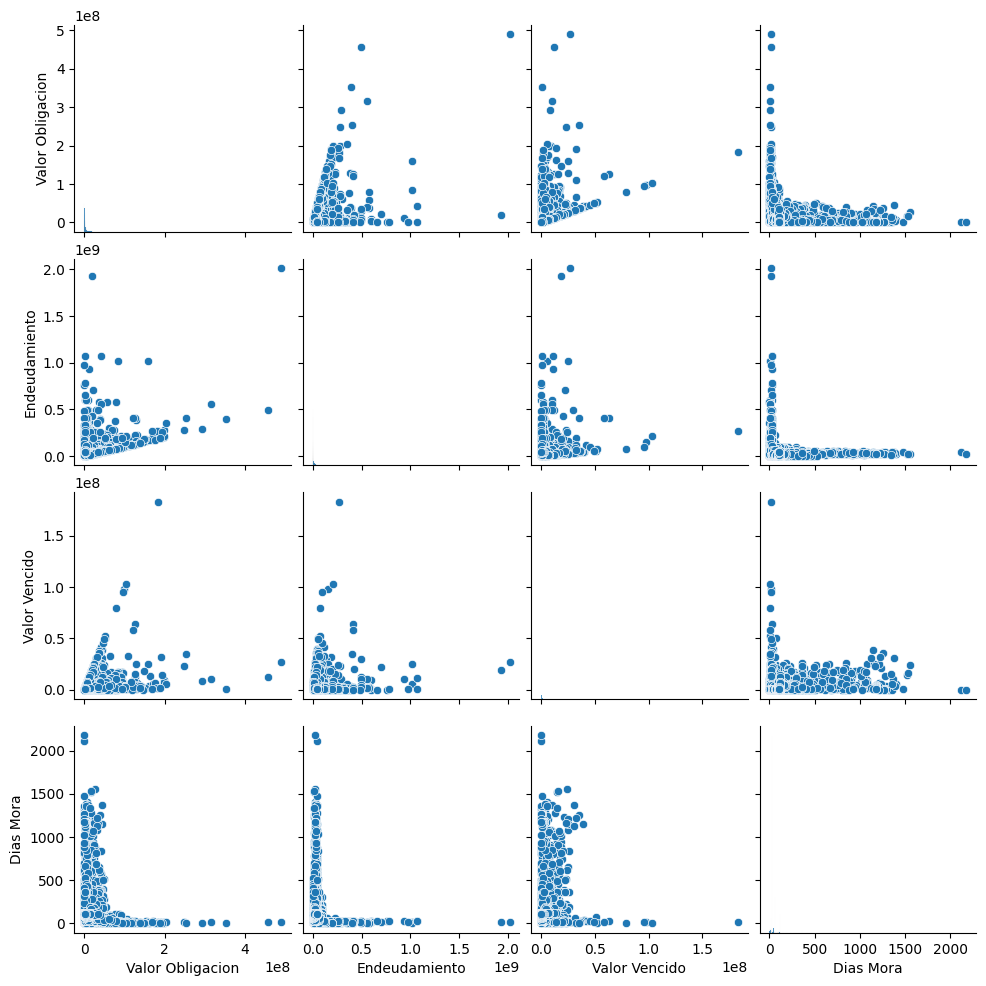

In [50]:
from seaborn.axisgrid import pairplot
pairplot(V_num)

In [51]:
V_num.describe()

,Valor Obligacion,Endeudamiento,Valor Vencido,Dias Mora
count,7.824400e+04,7.824400e+04,7.824400e+04,78244.000000
mean,4.424137e+06,1.221046e+07,7.009347e+05,48.737322
std,9.314002e+06,2.792109e+07,1.968822e+06,71.490121
min,1.804400e+04,1.804400e+04,2.001000e+04,1.000000
25%,6.864612e+05,1.079163e+06,9.493975e+04,30.000000
50%,1.604043e+06,3.751736e+06,2.132975e+05,30.000000
75%,3.929639e+06,1.329720e+07,5.575980e+05,46.000000
max,4.894150e+08,2.012549e+09,1.831087e+08,2175.000000


# Evaluación de la efectividad de la gestión de cobranza

Creamos un nuevo Dataset para trabajar con los datos de los abogados

In [56]:
abogados=data

In [57]:
cobranza=abogados[["PRODUCTO", "Dias Mora", "Abogado", "Regional", "Endeudamiento"]]

In [58]:
cobranza.groupby(["Abogado", "Regional"]).aggregate({"Endeudamiento":"mean"}).reset_index(inplace=True)


<Axes: xlabel='Abogado', ylabel='Endeudamiento'>

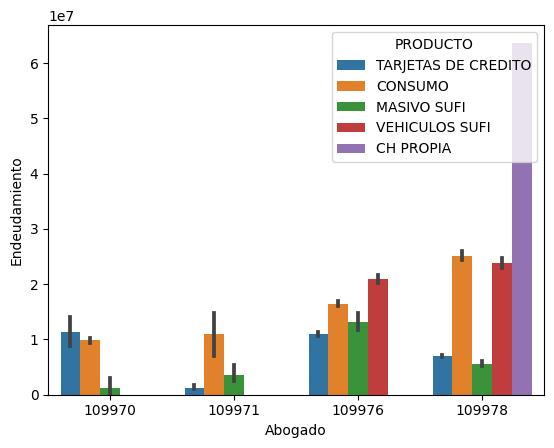

In [59]:
sns.barplot(cobranza, x="Abogado", y="Endeudamiento", hue="PRODUCTO")

<Axes: xlabel='Abogado', ylabel='Dias Mora'>

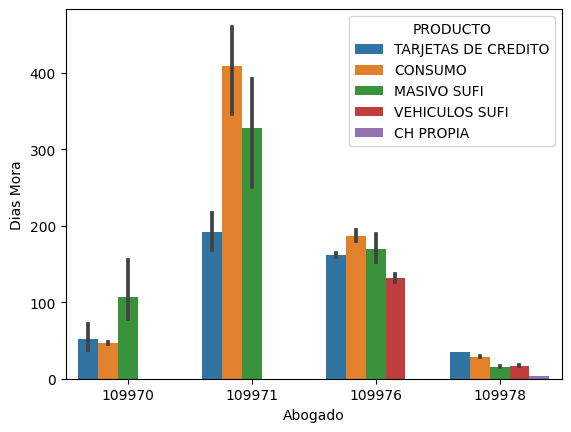

In [60]:
cobranza.groupby(["Abogado"]).aggregate({"Dias Mora":"mean"}).reset_index(inplace=True)
sns.barplot(cobranza, x="Abogado", y="Dias Mora", hue="PRODUCTO")

Por el momento, según los datos que hemos revisado el mejor abogado es el *78 porque es el que más dinero debe, pero el que tiene una cobranza más efectiva, dado que el promedio de los días en mora son más bajos en comparación con los otros abogados, esa puede ser una razón por la cual puede prestar montos más grandes

Ahora realizemos un análisis basado en la calificación real, intentando hallar una relación con los abogados que atienden los casos

In [61]:
calificacion_real=data.groupby(["Abogado", "Calificacion Real"])["Endeudamiento"].aggregate(["sum", "count"])
calificacion_real.reset_index(inplace=True)

In [62]:
calificacion_real

,Abogado,Calificacion Real,sum,count
0,109970,0,3.374243e+08,38
1,109970,1,4.629583e+09,448
2,109970,2,6.820851e+09,711
3,109970,3,4.722279e+09,486
4,109971,0,1.261775e+07,11
5,109971,1,1.671052e+08,76
6,109971,2,7.695995e+07,54
7,109971,3,2.541949e+07,21
8,109976,0,9.233600e+07,3
9,109976,1,2.273251e+10,1038


In [63]:
calificacion_real["Calificacion Real"]=calificacion_real["Calificacion Real"].astype("str")
calificacion_real.rename(columns=({"count":"Cantidad De Personas"}), inplace=True)

<Axes: xlabel='Abogado', ylabel='Cantidad De Personas'>

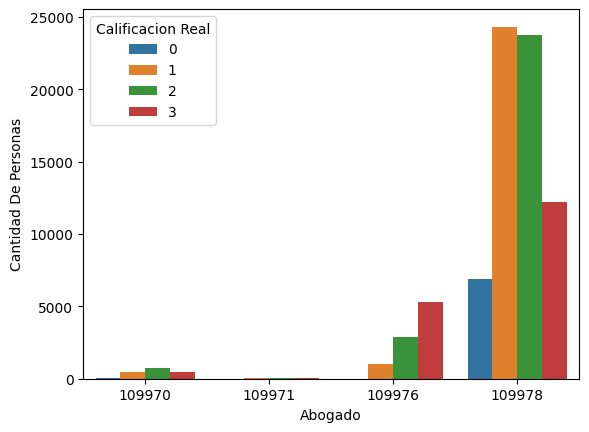

In [64]:
sns.barplot(calificacion_real, x="Abogado", y="Cantidad De Personas", hue="Calificacion Real")

El abogado con mejor gestión es *978 dado que es el que más dinero debe cobrar, se encarga de una mayor cantidad de clientes y también es el abogado en el que los clientes presentan menos días de mora

Ahora vamos a realizarla revisión del comportamiento de los datos basados en el tipo de producto utilizado para realizar el crédito

In [65]:
calificacion_producto=data.groupby(["PRODUCTO", "Calificacion Real"])["PRODUCTO"].aggregate([ "count"])
calificacion_producto.reset_index(inplace=True)
calificacion_producto["Calificacion Real"]=calificacion_producto["Calificacion Real"].astype("str")

<Axes: xlabel='PRODUCTO', ylabel='count'>

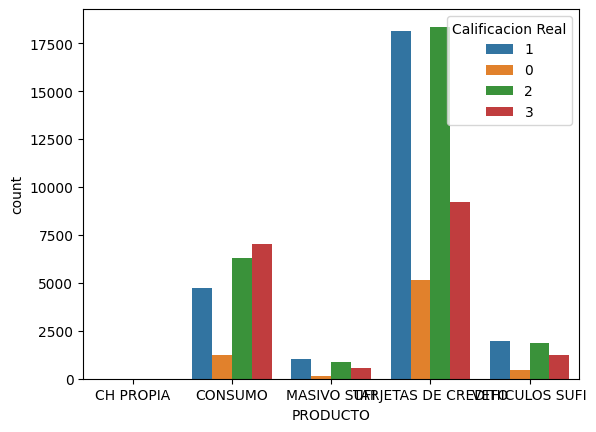

In [66]:
sns.barplot(calificacion_producto, x="PRODUCTO", y="count", hue="Calificacion Real")

De la grafica se puede deducir que no hay una distribución de la calificacion real basado en el tipo de producto, exceotuando que la calificación que varía entre la clase 1 y 2 se encuentran mayoritariamente en las tarjetas de crédito. Mientras que para los otros tpos de producto no es posible sacar una conclusión

Para evitar los problemas relacionados con la distribución de la cantidad de clientes de los abogados, dado que la mayoría de datos (aproximadamente el **83%**) de los datos están en el abogado *978 se realizará un análisis basado en el porcentaje por abogado, de esta manera se intentará disminuir el impacto de la cantidad de datos en un solo abogado. En la **siguiente tabla** se puede observar que la mayor cantidad de datos pertenecen a este abogado

In [67]:
data_abogado  = data.groupby(['Abogado']).agg({'Nit':'count','Valor Obligacion':'sum'}).reset_index()
data_abogado.rename(columns={'Nit':'Conteo'}, inplace=True)
data_abogado['%Obligaciones'] = data_abogado['Conteo']/sum(data_abogado['Conteo'])
data_abogado

,Abogado,Conteo,Valor Obligacion,%Obligaciones
0,109970,1683,1.369714e+10,0.021510
1,109971,162,2.330658e+08,0.002070
2,109976,9198,5.187210e+10,0.117555
3,109978,67201,2.803599e+11,0.858865


# Clasificcion

In [68]:
PRODUCTO = pd.get_dummies(data['PRODUCTO'],drop_first=True)
FRANJA = pd.get_dummies(data['FRANJA'],drop_first=True)
Segmento = pd.get_dummies(data['Segmento'],drop_first=True)
Cuadrante = pd.get_dummies(data['Cuadrante'],drop_first=True)
Descripcion_Causal = pd.get_dummies(data['Descripcion Causal'],drop_first=True)

In [69]:
data.drop(['PRODUCTO','FRANJA','Segmento','Cuadrante','Descripcion Causal'],axis=1,inplace=True)

In [ ]:
data.drop(['Red','Calificacion Real','Consecutivo Documento Deudor','Tipo De Producto',],axis=1,inplace=True)

In [71]:
data1 = pd.concat([data,PRODUCTO,FRANJA,Segmento,Cuadrante,Descripcion_Causal],axis=1)

In [73]:
data1.head(5)

,Consecutivo Documento Deudor,Nit,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,REGION,Abogado,Dias Mora,Fecha Traslado Para Cobro,...,ROBO,SIN CAUSAL DE MORA,SOBREENDEUDAMIENTO,TRAMITE REESTRUCTURACION - ACUERDO DE PAGO,TRAMITE SUBROGACION,Titular de un credito pagado por un tercero,Titular y/o Cotitular fallecido,VENTA A TERCERO,VIAJE,Victima por conflicto
0,28768192,18,3,5637605.0,152093.0,2099,BOGOTA,109978,30,2015-06-03,...,0,0,0,0,0,0,0,0,0,0
1,2712044,22,5,40584.0,40584.0,2099,BOGOTA,109976,110,2015-06-23,...,0,1,0,0,0,0,0,0,0,0
2,13587837,23,3,2786178.0,547088.0,3099,SUR,109978,60,2015-05-31,...,0,0,0,0,0,0,0,0,0,0
3,23479925,46,3,5904653.0,1455631.0,2099,BOGOTA,109978,90,2015-05-31,...,0,0,0,0,0,0,0,0,0,0
4,2712382,92,5,2221125.0,2221125.0,6399,CENTRO,109978,48,2015-05-29,...,0,0,0,0,0,0,0,0,0,0
